# Ćwiczenie 5. Napisz skrypt w Pythonie/Matlabie umożliwiający wczytywanie i wizualizację badanych obrazów. Program powinien umożliwiać wyświetlanie obrazu wczytanego z pliku o podanej nazwie, wybór podobrazu (prostokątnego obszaru) o podanych współrzędnych oraz jego zapis do zadanego pliku.

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def wyswietl_obraz(obraz, czesc=[0,10000,0,10000]):
    obraz_c = cv2.cvtColor(obraz, cv2.COLOR_BGR2RGB)
    plt.imshow(obraz_c[czesc[0]:czesc[1],czesc[2]:czesc[3]])

In [3]:
def wczytaj_obraz(nazwa, typ=None):
    return cv2.imread('images/{}.jpg'.format(nazwa)) if typ is None else cv2.imread('images/{}.jpg'.format(nazwa),0)

In [4]:
def zapisz_obraz(obraz, nazwa, czesc=[0,10000,0,10000]):
    cv2.imwrite('images/{}.jpg'.format(nazwa),obraz[czesc[0]:czesc[1],czesc[2]:czesc[3]])

In [5]:
ptak = wczytaj_obraz('bird')
ptak_mono = wczytaj_obraz('bird', 0)
wodospad = wczytaj_obraz('waterfall')
wodospad_mono = wczytaj_obraz('waterfall',0)
lis = wczytaj_obraz('lis')
lis_mono = wczytaj_obraz('lis',0)

# Ćwiczenie 6. Zaobserwuj działanie następujących przekształceń punktowych na przykładowych obrazach:


a) Mnożenie obrazu przez stałą $T(r) = c · r$, gdzie $c$ jest stałą.

In [6]:
def mnozenie_punktowe(obraz, c):
    obraz_c=(obraz.copy()).astype(np.uint16)
    obraz_c=np.clip(obraz_c*c, 0, 255)
    return obraz_c.astype('uint8')

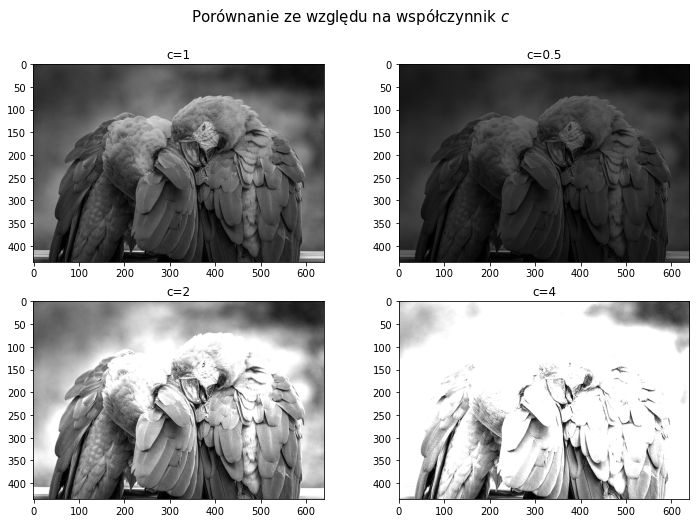

In [7]:
plt.figure(figsize=(12,8))
plt.suptitle('Porównanie ze względu na współczynnik $c$', fontsize=15)

plt.subplot(2,2,1)
ptak_c = mnozenie_punktowe(ptak_mono,1)
wyswietl_obraz(ptak_c)
plt.title('c=1')

plt.subplot(2,2,2)
ptak_c = mnozenie_punktowe(ptak_mono,0.5)
wyswietl_obraz(ptak_c)
plt.title('c=0.5');

plt.subplot(2,2,3)
ptak_c = mnozenie_punktowe(ptak_mono,2)
wyswietl_obraz(ptak_c)
plt.title('c=2');

plt.subplot(2,2,4)
ptak_c = mnozenie_punktowe(ptak_mono,4)
wyswietl_obraz(ptak_c)
plt.title('c=4');

b) Zmianę dynamiki skali szarości (kontrastu). Możesz zastosować transformacjęo postaci: $T(r) = 1/(1+(m/r)^e)$ gdzie $m$ i $e$ są ustalonymi parametrami przekształcenia (np. $m = 0.45$, $e = 8$). Wykreśl $T(r)$, by lepiej uwidocznić wpływ $T$ na kontrast obrazu wyjściowego. Przeprowadź eksperymenty z różnymi wartościami parametrów $m$ i $e$.

In [8]:
def zmiana_dynamiki(obraz, m, e):
    return (255/(1+np.power(m/(obraz.copy()/255.0),e))).astype('uint8')

C:\Users\kulaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


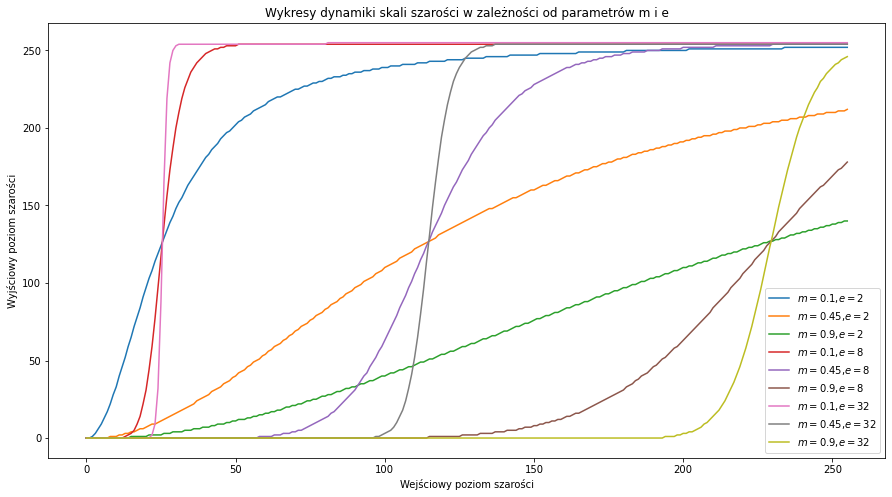

In [9]:
wejscie=np.arange(0,256)
wyjscie_01_2 = zmiana_dynamiki(wejscie,0.1,2)
wyjscie_045_2 = zmiana_dynamiki(wejscie,0.45,2)
wyjscie_09_2 = zmiana_dynamiki(wejscie,0.9,2)
wyjscie_01_8 = zmiana_dynamiki(wejscie,0.1,8)
wyjscie_045_8 = zmiana_dynamiki(wejscie,0.45,8)
wyjscie_09_8 = zmiana_dynamiki(wejscie,0.9,8)
wyjscie_01_32 = zmiana_dynamiki(wejscie,0.1,32)
wyjscie_045_32 = zmiana_dynamiki(wejscie,0.45,32)
wyjscie_09_32 = zmiana_dynamiki(wejscie,0.9,32)

plt.figure(figsize=(15,8))
plt.title("Wykresy dynamiki skali szarości w zależności od parametrów m i e")
plt.xlabel("Wejściowy poziom szarości")
plt.ylabel("Wyjściowy poziom szarości")

plt.plot(wejscie, wyjscie_01_2, label='$m=0.1$,$e=2$')
plt.plot(wejscie, wyjscie_045_2, label='$m=0.45$,$e=2$')
plt.plot(wejscie, wyjscie_09_2, label='$m=0.9$,$e=2$')
plt.plot(wejscie, wyjscie_01_8, label='$m=0.1$,$e=8$')
plt.plot(wejscie, wyjscie_045_8, label='$m=0.45$,$e=8$')
plt.plot(wejscie, wyjscie_09_8, label='$m=0.9$,$e=8$')
plt.plot(wejscie, wyjscie_01_32, label='$m=0.1$,$e=32$')
plt.plot(wejscie, wyjscie_045_32, label='$m=0.45$,$e=32$')
plt.plot(wejscie, wyjscie_09_32, label='$m=0.9$,$e=32$')

plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5));

C:\Users\kulaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


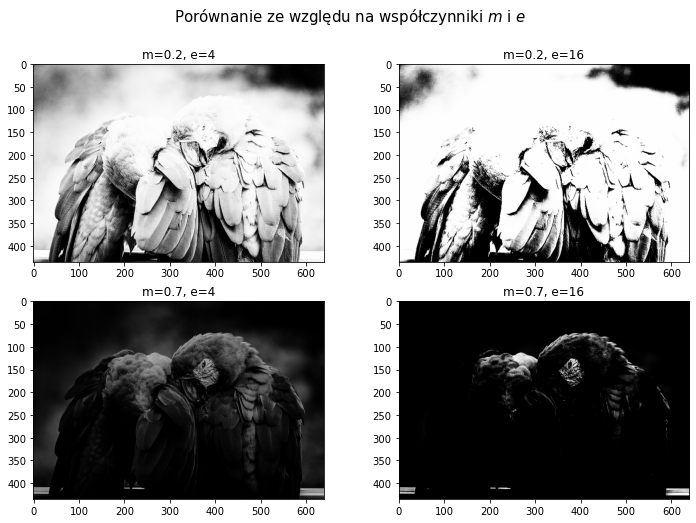

In [10]:
plt.figure(figsize=(12,8))
plt.suptitle('Porównanie ze względu na współczynniki $m$ i $e$',fontsize=15)

plt.subplot(2,2,1)
ptak_c = zmiana_dynamiki(ptak_mono, 0.2, 4)
wyswietl_obraz(ptak_c)
plt.title('m=0.2, e=4')

plt.subplot(2,2,2)
ptak_c = zmiana_dynamiki(ptak_mono, 0.2, 16)
wyswietl_obraz(ptak_c)
plt.title('m=0.2, e=16')

plt.subplot(2,2,3)
ptak_c = zmiana_dynamiki(ptak_mono, 0.7, 4)
wyswietl_obraz(ptak_c)
plt.title('m=0.7, e=4')

plt.subplot(2,2,4)
ptak_c = zmiana_dynamiki(ptak_mono, 0.7, 16)
wyswietl_obraz(ptak_c)
plt.title('m=0.7, e=16');

c) Korekcję gamma, zdefiniowaną jako $s=c·r^γ$, gdzie $c>0$ i $γ>0$ są stałymi we wzorze przekształcenia.


In [11]:
def korekcja_gamma(obraz, c, gamma):
    obraz_c=(obraz.copy()).astype(np.uint16)
    obraz_c=np.clip((255*c*np.power(obraz_c/255.0,gamma)), 0, 255)
    return obraz_c.astype('uint8')

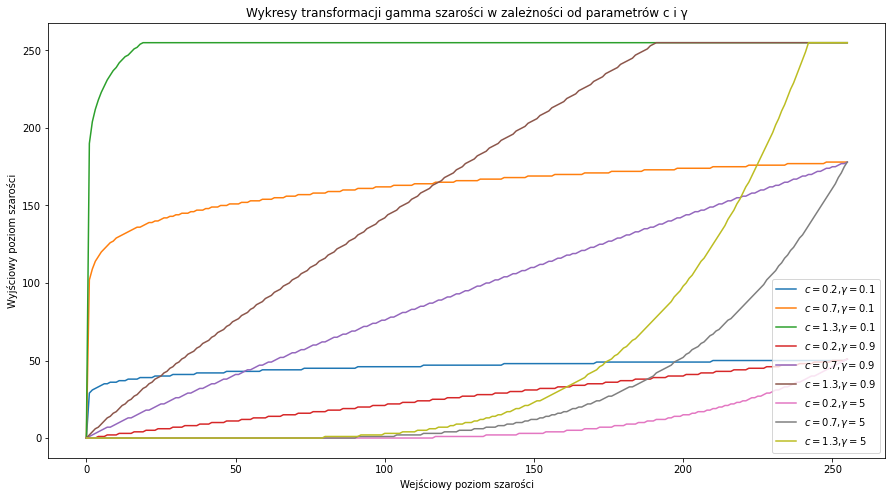

In [12]:
wejscie=np.arange(0,256)
wyjscie_01_2 = korekcja_gamma(wejscie,0.2,0.1)
wyjscie_045_2 = korekcja_gamma(wejscie,0.7,0.1)
wyjscie_09_2 = korekcja_gamma(wejscie,1.3,0.1)
wyjscie_01_8 = korekcja_gamma(wejscie,0.2,0.9)
wyjscie_045_8 = korekcja_gamma(wejscie,0.7,0.9)
wyjscie_09_8 = korekcja_gamma(wejscie,1.3,0.9)
wyjscie_01_32 = korekcja_gamma(wejscie,0.2,5)
wyjscie_045_32 = korekcja_gamma(wejscie,0.7,5)
wyjscie_09_32 = korekcja_gamma(wejscie,1.3,5)

plt.figure(figsize=(15,8))
plt.title("Wykresy transformacji gamma szarości w zależności od parametrów c i γ")
plt.xlabel("Wejściowy poziom szarości")
plt.ylabel("Wyjściowy poziom szarości")

plt.plot(wejscie, wyjscie_01_2, label='$c=0.2$,$γ=0.1$')
plt.plot(wejscie, wyjscie_045_2, label='$c=0.7$,$γ=0.1$')
plt.plot(wejscie, wyjscie_09_2, label='$c=1.3$,$γ=0.1$')
plt.plot(wejscie, wyjscie_01_8, label='$c=0.2$,$γ=0.9$')
plt.plot(wejscie, wyjscie_045_8, label='$c=0.7$,$γ=0.9$')
plt.plot(wejscie, wyjscie_09_8, label='$c=1.3$,$γ=0.9$')
plt.plot(wejscie, wyjscie_01_32, label='$c=0.2$,$γ=5$')
plt.plot(wejscie, wyjscie_045_32, label='$c=0.7$,$γ=5$')
plt.plot(wejscie, wyjscie_09_32, label='$c=1.3$,$γ=5$')

# plt.legend(bbox_to_anchor=(1,1))
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.show()

$c$ - wyznacza wysokość, do jakiej zmierzają wykresy, im większa wartość, tym wyżej wykres wędruje, 1 to maksymalna wysokość, dla $c>1$ wykres od pewnego momentu zaczyna się wypłaszczać

$γ$ - wyznacza szybkość dążenia do maksymalnego poziomu, im gamma wyższe, tym wolniej do tego poziomu dąży, dla $γ=1$ wykres dąży liniowo

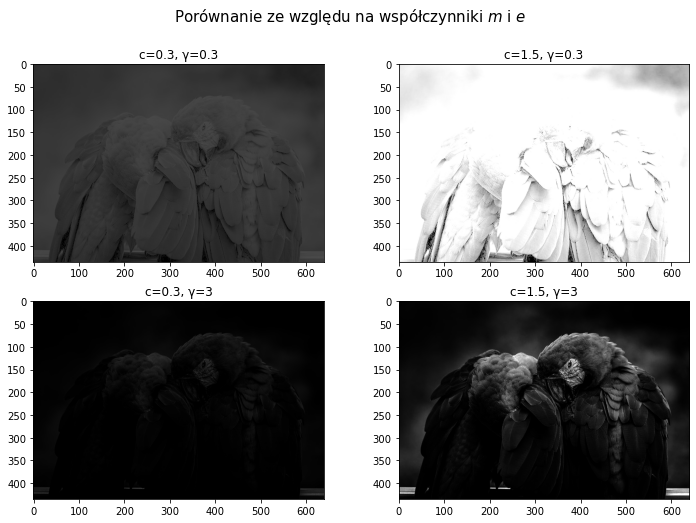

In [13]:
plt.figure(figsize=(12,8))
plt.suptitle('Porównanie ze względu na współczynniki $m$ i $e$',fontsize=15)

plt.subplot(2,2,1)
ptak_c = korekcja_gamma(ptak_mono, 0.3, 0.3)
wyswietl_obraz(ptak_c)
plt.title('c=0.3, γ=0.3')

plt.subplot(2,2,2)
ptak_c = korekcja_gamma(ptak_mono, 1.5, 0.3)
wyswietl_obraz(ptak_c)
plt.title('c=1.5, γ=0.3')

plt.subplot(2,2,3)
ptak_c = korekcja_gamma(ptak_mono, 0.3, 3)
wyswietl_obraz(ptak_c)
plt.title('c=0.3, γ=3')

plt.subplot(2,2,4)
ptak_c = korekcja_gamma(ptak_mono, 1.5, 3)
wyswietl_obraz(ptak_c)
plt.title('c=1.5, γ=3');

# Ćwiczenie 7. Wypróbuj działanie wyrównywania histogramu na przykładowych obrazach. By zaobserwować skuteczność procedury, poddaj wyrównywaniu obrazy zbyt ciemne i zbyt jasne. Narysować histogramy obrazów przed i po wyrównaniu

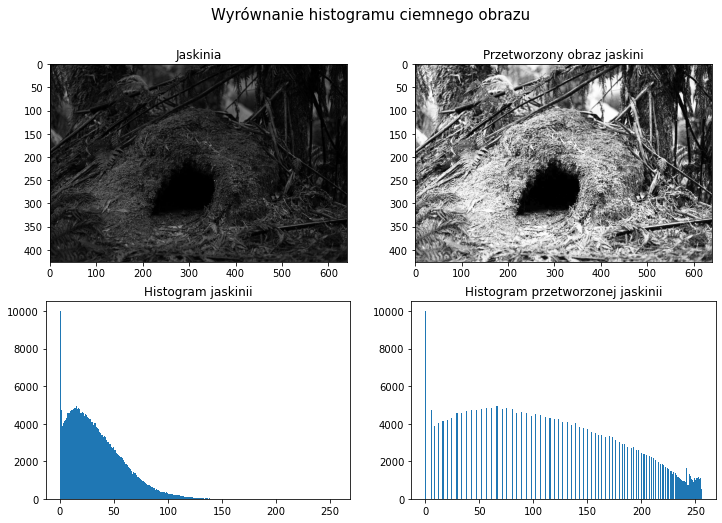

In [14]:
plt.figure(figsize=(12,8))
plt.suptitle('Wyrównanie histogramu ciemnego obrazu', fontsize=15)

plt.subplot(2,2,1)
las = wczytaj_obraz('cave',0)
wyswietl_obraz(las)
plt.title('Jaskinia')

plt.subplot(2,2,2)
las_e = cv2.equalizeHist(las)
wyswietl_obraz(las_e)
plt.title('Przetworzony obraz jaskini')

plt.subplot(2,2,3)
plt.hist(las.ravel(),256,[0,256]);
plt.title('Histogram jaskinii')

plt.subplot(2,2,4)
plt.hist(las_e.ravel(),256,[0,256]);
plt.title('Histogram przetworzonej jaskinii');

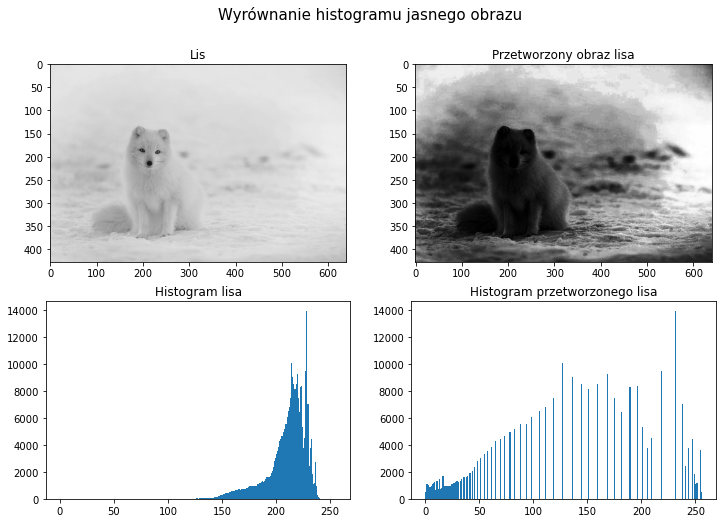

In [15]:
plt.figure(figsize=(12,8))
plt.suptitle('Wyrównanie histogramu jasnego obrazu', fontsize=15)

plt.subplot(2,2,1)
wyswietl_obraz(lis_mono)
plt.title('Lis')

plt.subplot(2,2,2)
lis_e = cv2.equalizeHist(lis_mono)
wyswietl_obraz(lis_e)
plt.title('Przetworzony obraz lisa')

plt.subplot(2,2,3)
plt.hist(lis_mono.ravel(),256,[0,256]);
plt.title('Histogram lisa');

plt.subplot(2,2,4)
plt.hist(lis_e.ravel(),256,[0,256]);
plt.title('Histogram przetworzonego lisa');

# Ćwiczenie 8. Zbadaj skuteczność redukcji szumu typu „sól i pieprz” za pomocą

a) liniowego filtra uśredniającego z kwadratową maską, rozpoczynając od maski rozmiaru 3 × 3.


In [16]:
def liniowy_filtr(img, ksize = 3):
    img = cv2.blur(img, (ksize,ksize))
    return img

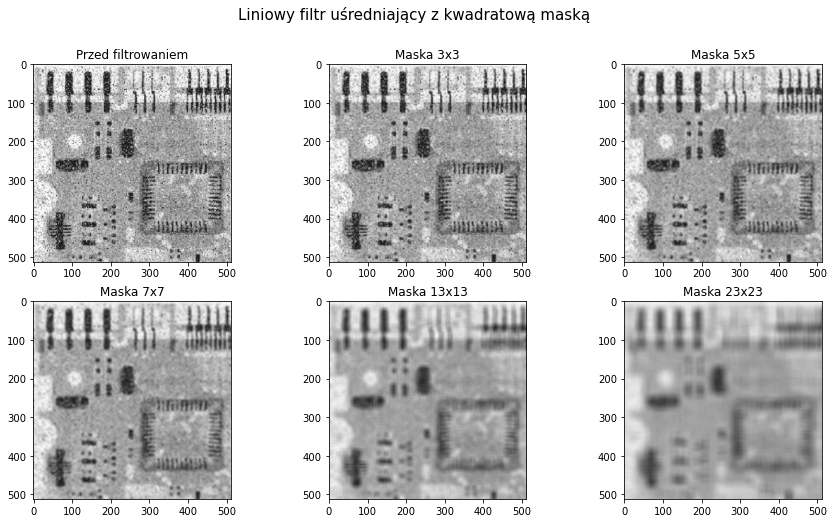

In [17]:
plt.figure(figsize=(15,8))
plt.suptitle('Liniowy filtr uśredniający z kwadratową maską', fontsize=15)

plt.subplot(2,3,1)
s_p = wczytaj_obraz('sol_pieprz',0)
wyswietl_obraz(s_p)
plt.title('Przed filtrowaniem')

plt.subplot(2,3,2)
s_p_3 = liniowy_filtr(s_p,3)
wyswietl_obraz(s_p_3)
plt.title('Maska 3x3')

plt.subplot(2,3,3)
s_p_5 = liniowy_filtr(s_p,5)
wyswietl_obraz(s_p_5)
plt.title('Maska 5x5')

plt.subplot(2,3,4)
s_p_7 = liniowy_filtr(s_p,7)
wyswietl_obraz(s_p_7)
plt.title('Maska 7x7')

plt.subplot(2,3,5)
s_p_13 = liniowy_filtr(s_p,13)
wyswietl_obraz(s_p_13)
plt.title('Maska 13x13')

plt.subplot(2,3,6)
s_p_23 = liniowy_filtr(s_p,23)
wyswietl_obraz(s_p_23)
plt.title('Maska 23x23');

b) nieliniowego filtra medianowego.

In [18]:
def nieliniowy_filtr(img, ksize = 3):
    img = cv2.medianBlur(img,ksize)
    return img

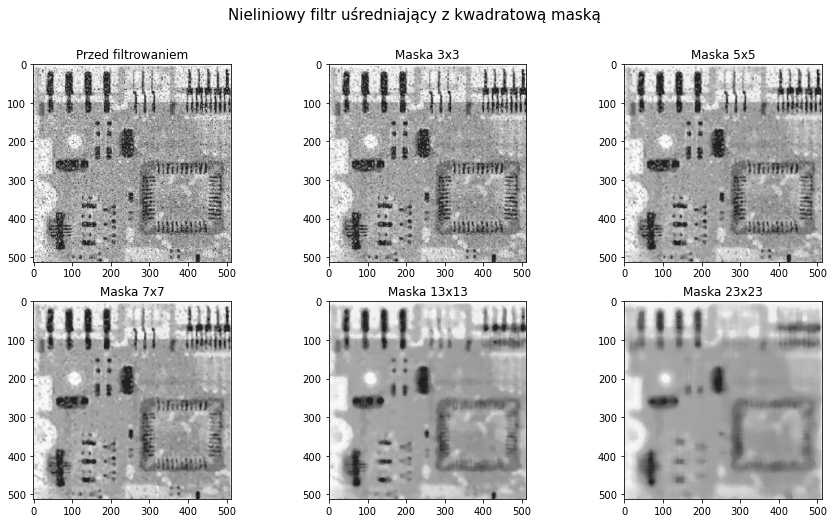

In [19]:
plt.figure(figsize=(15,8))
plt.suptitle('Nieliniowy filtr uśredniający z kwadratową maską', fontsize=15)

plt.subplot(2,3,1)
s_p = wczytaj_obraz('sol_pieprz',0)
wyswietl_obraz(s_p)
plt.title('Przed filtrowaniem')

plt.subplot(2,3,2)
s_p_3 = nieliniowy_filtr(s_p,3)
wyswietl_obraz(s_p_3)
plt.title('Maska 3x3')

plt.subplot(2,3,3)
s_p_5 = nieliniowy_filtr(s_p,5)
wyswietl_obraz(s_p_5)
plt.title('Maska 5x5')

plt.subplot(2,3,4)
s_p_7 = nieliniowy_filtr(s_p,7)
wyswietl_obraz(s_p_7)
plt.title('Maska 7x7')

plt.subplot(2,3,5)
s_p_13 = nieliniowy_filtr(s_p,13)
wyswietl_obraz(s_p_13)
plt.title('Maska 13x13')

plt.subplot(2,3,6)
s_p_23 = nieliniowy_filtr(s_p,23)
wyswietl_obraz(s_p_23)
plt.title('Maska 23x23');

# Ćwiczenie 9. Zastosuj filtry górnoprzepustowe do wykrywania krawędzi na przykładowych obrazach.


a) Użyj filtra z maską Sobela do wykrywania krawędzi.


In [20]:
def sobel(img):
    img = cv2.GaussianBlur(img, (3, 3), 0)
    grad_x = cv2.Sobel(img, cv2.CV_16S, 1, 0, ksize=3)
    grad_y = cv2.Sobel(img, cv2.CV_16S, 0, 1, ksize=3)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    return cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

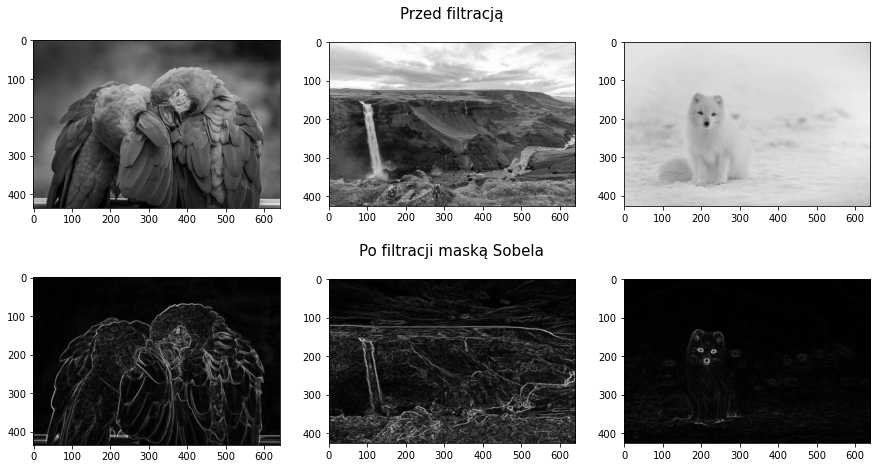

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
wyswietl_obraz(ptak_mono)
plt.subplot(2,3,2)
wyswietl_obraz(wodospad_mono)
plt.title('Przed filtracją\n', fontsize=15)
plt.subplot(2,3,3)
wyswietl_obraz(lis_mono)
plt.subplot(2,3,4)
wyswietl_obraz(sobel(ptak_mono))
plt.subplot(2,3,5)
wyswietl_obraz(sobel(wodospad_mono))
plt.title('Po filtracji maską Sobela\n', fontsize=15)
plt.subplot(2,3,6)
wyswietl_obraz(sobel(lis_mono))

b) Zaobserwuj działanie Laplasjanu do wyostrzania szczegółów.

In [22]:
def laplacian(img, ksize=3):
    src = cv2.GaussianBlur(img, (3, 3), 0)
    dst = cv2.Laplacian(src, cv2.CV_16S, ksize=ksize)
    return cv2.convertScaleAbs(dst)

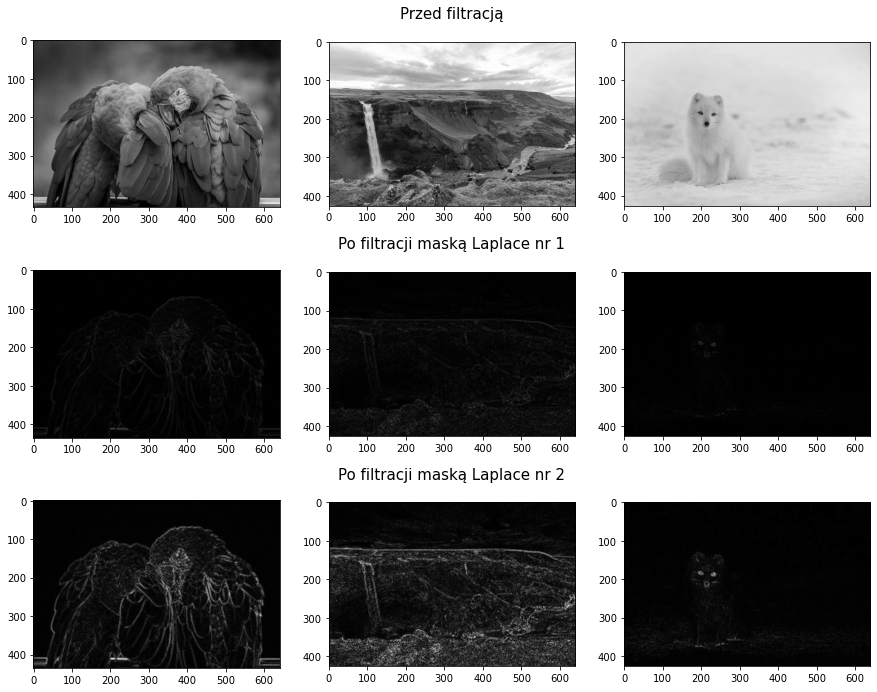

In [23]:
plt.figure(figsize=(15,12))
plt.subplot(3,3,1)
wyswietl_obraz(ptak_mono)
plt.subplot(3,3,2)
wyswietl_obraz(wodospad_mono)
plt.title('Przed filtracją\n', fontsize=15)
plt.subplot(3,3,3)
wyswietl_obraz(lis_mono)

plt.subplot(3,3,4)
wyswietl_obraz(laplacian(ptak_mono,1))
plt.subplot(3,3,5)
wyswietl_obraz(laplacian(wodospad_mono,1))
plt.title('Po filtracji maską Laplace nr 1\n', fontsize=15)
plt.subplot(3,3,6)
wyswietl_obraz(laplacian(lis_mono,1))

plt.subplot(3,3,7)
wyswietl_obraz(laplacian(ptak_mono))
plt.subplot(3,3,8)
wyswietl_obraz(laplacian(wodospad_mono))
plt.title('Po filtracji maską Laplace nr 2\n', fontsize=15)
plt.subplot(3,3,9)
wyswietl_obraz(laplacian(lis_mono))

Maska Laplace nr 1: 
$$ 
\begin{bmatrix}
0 & -1 & 0 \\ 
-1 & 4 & -1 \\
0 & -1 & 0
\end{bmatrix}
$$
Maska Laplace nr 2: 
$$ 
\begin{bmatrix}
-1 & -1 & -1 \\ 
-1 & 8 & -1 \\
-1 & -1 & -1
\end{bmatrix}
$$